<a href="https://colab.research.google.com/github/MarahRamadan/Statistical-Analysis-for-Real-Estate/blob/main/Data_Wrangling%2C_Visualization_and_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Data Sets**

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Real Estate Florida.xlsx to Real Estate Florida.xlsx
User uploaded file "Real Estate Florida.xlsx" with length 41621 bytes


**Data Wrangling:**

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set() #overwrite the matplotlib with style of seaborn, we'll code the graphs using matplot but displayed with seaborn

In [4]:
import io

df = pd.read_excel(io.BytesIO(uploaded['Real Estate Florida.xlsx']))

In [5]:
df.head()

,Unnamed: 0,Real Estate Florida,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Year of sale,Month of sale,Type of property,Area (ft.),Price,Country,State,Mortgage
4,NaN,2005,9,House,1042.21,887889,USA,Florida,No


In [6]:
df.drop(df[:3].index, inplace=True)


In [7]:
df.head()

,Unnamed: 0,Real Estate Florida,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
3,NaN,Year of sale,Month of sale,Type of property,Area (ft.),Price,Country,State,Mortgage
4,NaN,2005,9,House,1042.21,887889,USA,Florida,No
5,NaN,2007,3,House,2103.94,875352,USA,Florida,No
6,NaN,2005,12,House,1894.35,869057,USA,Florida,No
7,NaN,2006,5,House,1783.18,795017,USA,Florida,No


In [8]:
df.drop(labels="Unnamed: 0", axis=1, inplace=True)


In [9]:
df.head()

,Real Estate Florida,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
3,Year of sale,Month of sale,Type of property,Area (ft.),Price,Country,State,Mortgage
4,2005,9,House,1042.21,887889,USA,Florida,No
5,2007,3,House,2103.94,875352,USA,Florida,No
6,2005,12,House,1894.35,869057,USA,Florida,No
7,2006,5,House,1783.18,795017,USA,Florida,No


In [10]:
df, df.columns = df[1:] , df.iloc[0]


In [11]:
df.columns

Index(['Year of sale', 'Month of sale', 'Type of property', 'Area (ft.)',
       'Price', 'Country', 'State', 'Mortgage'],
      dtype='object', name=3)

In [12]:
df.head()

3,Year of sale,Month of sale,Type of property,Area (ft.),Price,Country,State,Mortgage
4,2005,9,House,1042.21,887889,USA,Florida,No
5,2007,3,House,2103.94,875352,USA,Florida,No
6,2005,12,House,1894.35,869057,USA,Florida,No
7,2006,5,House,1783.18,795017,USA,Florida,No
8,2007,5,House,1787.51,787143,USA,Florida,Yes


In [13]:
df.reset_index(drop=True, inplace=True)
df.head()

3,Year of sale,Month of sale,Type of property,Area (ft.),Price,Country,State,Mortgage
0,2005,9,House,1042.21,887889,USA,Florida,No
1,2007,3,House,2103.94,875352,USA,Florida,No
2,2005,12,House,1894.35,869057,USA,Florida,No
3,2006,5,House,1783.18,795017,USA,Florida,No
4,2007,5,House,1787.51,787143,USA,Florida,Yes


**Data Visualization for Statistics**

Create three histograms based on the price variable of the different property types (Apartment, House, and Office).

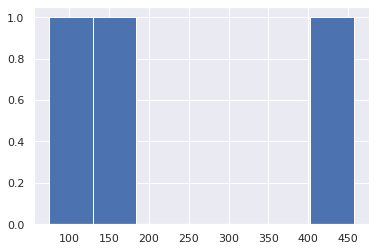

In [14]:
df.groupby('Type of property').count()['Price'].hist(bins=7)

In [15]:
grouped = df.groupby('Type of property')
grouped.head()

3,Year of sale,Month of sale,Type of property,Area (ft.),Price,Country,State,Mortgage
0,2005,9,House,1042.21,887889,USA,Florida,No
1,2007,3,House,2103.94,875352,USA,Florida,No
2,2005,12,House,1894.35,869057,USA,Florida,No
3,2006,5,House,1783.18,795017,USA,Florida,No
4,2007,5,House,1787.51,787143,USA,Florida,Yes
9,2007,12,Apartment,1505.05,763365,USA,Florida,Yes
11,2007,5,Apartment,1830.84,761413,USA,Florida,Yes
13,2007,9,Apartment,1506.15,760105,USA,Florida,Yes
14,2006,1,Apartment,1456.08,757632,USA,Florida,Yes
118,2006,10,Apartment,1732.74,562131,USA,Florida,No


In [16]:
group1 = grouped.get_group("Apartment")
group2 = grouped.get_group("House")
group3 = grouped.get_group("Office")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5046ca7510>,
      dtype=object)

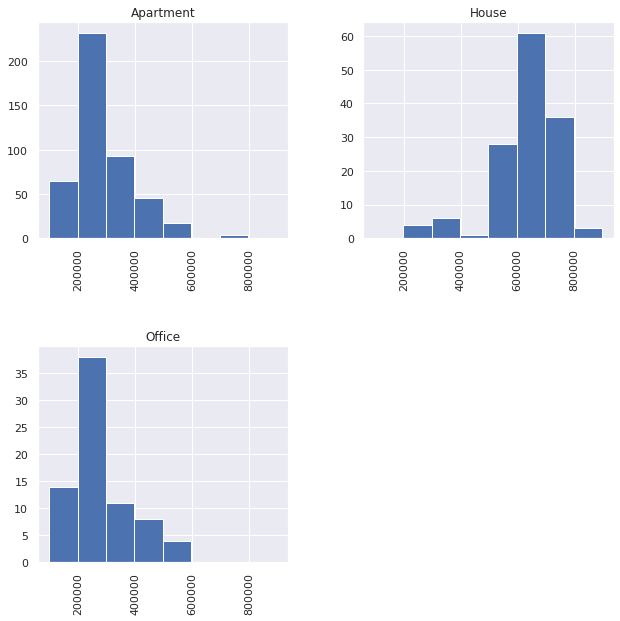

In [18]:
import numpy as np
binwidth = 100000
df.Price.hist(by=df['Type of property'],bins=np.arange(min(df['Price']), max(df['Price']) + binwidth, binwidth)
              , figsize=(10,10))

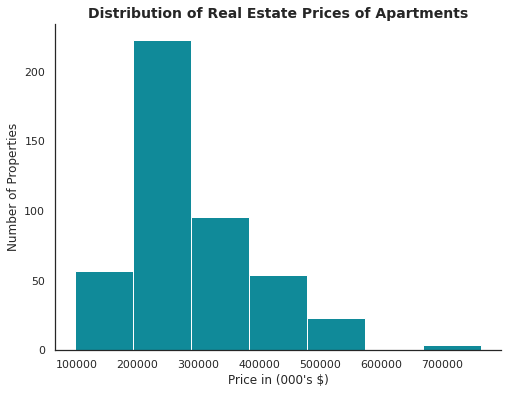

763365.0
223.0


In [47]:
sns.set_style("white") # override the default matplotlib style, to avoid the grey background and grid
plt.figure(figsize = (8, 6)) # determine the size of the figure
y, x, patches = plt.hist(group1["Price"],# the variable on which to create the histogram
         bins = 7, # create a histogram with 8 bins
         color = "#108A99")
plt.title("Distribution of Real Estate Prices of Apartments", fontsize = 14, weight = "bold")
plt.xlabel("Price in (000's $)")
plt.ylabel("Number of Properties")
sns.despine() # removes the top and right border of our graph
plt.show()

print (x.max())
print (y.max())


In [48]:
[print(x) for x in patches] 

Rectangle(xy=(97669, 0), width=95099.4, height=57, angle=0)
Rectangle(xy=(192768, 0), width=95099.4, height=223, angle=0)
Rectangle(xy=(287868, 0), width=95099.4, height=96, angle=0)
Rectangle(xy=(382967, 0), width=95099.4, height=54, angle=0)
Rectangle(xy=(478067, 0), width=95099.4, height=23, angle=0)
Rectangle(xy=(573166, 0), width=95099.4, height=0, angle=0)
Rectangle(xy=(668266, 0), width=95099.4, height=4, angle=0)


[None, None, None, None, None, None, None]

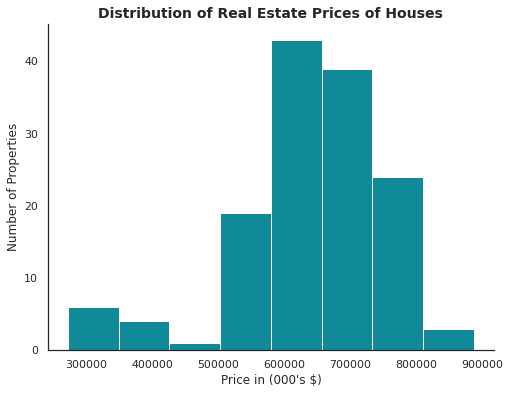

In [22]:
sns.set_style("white") # override the default matplotlib style, to avoid the grey background and grid
plt.figure(figsize = (8, 6)) # determine the size of the figure
plt.hist(group2["Price"],# the variable on which to create the histogram
         bins = 8, # create a histogram with 8 bins
         color = "#108A99")
plt.title("Distribution of Real Estate Prices of Houses", fontsize = 14, weight = "bold")
plt.xlabel("Price in (000's $)")
plt.ylabel("Number of Properties")
sns.despine() # removes the top and right border of our graph
plt.show()

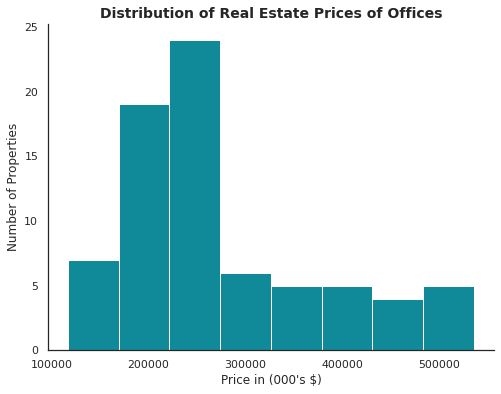

In [23]:
sns.set_style("white") # override the default matplotlib style, to avoid the grey background and grid
plt.figure(figsize = (8, 6)) # determine the size of the figure
plt.hist(group3["Price"],# the variable on which to create the histogram
         bins = 8, # create a histogram with 8 bins
         color = "#108A99")
plt.title("Distribution of Real Estate Prices of Offices", fontsize = 14, weight = "bold")
plt.xlabel("Price in (000's $)")
plt.ylabel("Number of Properties")
sns.despine() # removes the top and right border of our graph
plt.show()

The scatter plots show a very strong linear relationship between Price and Area for Apartments 

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


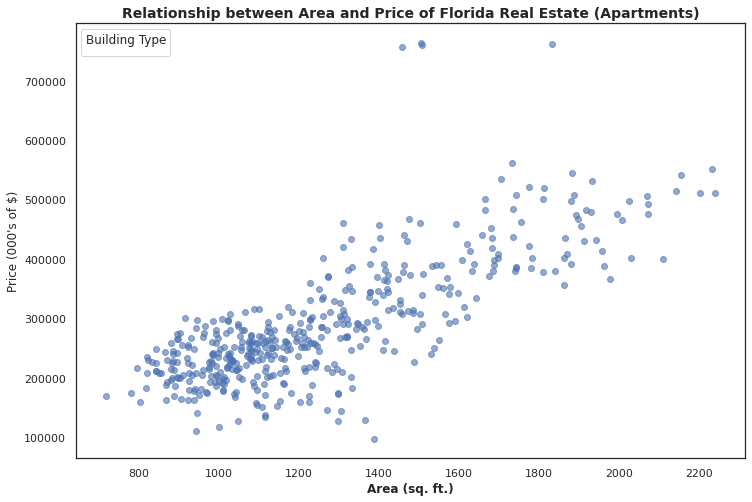

In [53]:
plt.figure(figsize = (12, 8)) # size of the figure
scatter = plt.scatter(group1['Area (ft.)'],
            group1['Price'], 
            alpha = 0.6, #transparency level of points on the plot. Used to avoid overplotting
            cmap = 'viridis') #color map for the third variable
# add and format additional elements, such as legends, titles and axis labels
plt.legend(*scatter.legend_elements(),
           loc = "upper left",
           title = "Building Type")
plt.title("Relationship between Area and Price of Florida Real Estate (Apartments)", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Area (sq. ft.)", weight = "bold")
plt.ylabel("Price (000's of $)")
plt.show()

At the same time, the scatter plot shows a low correlation between Price and Area for Houses.

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


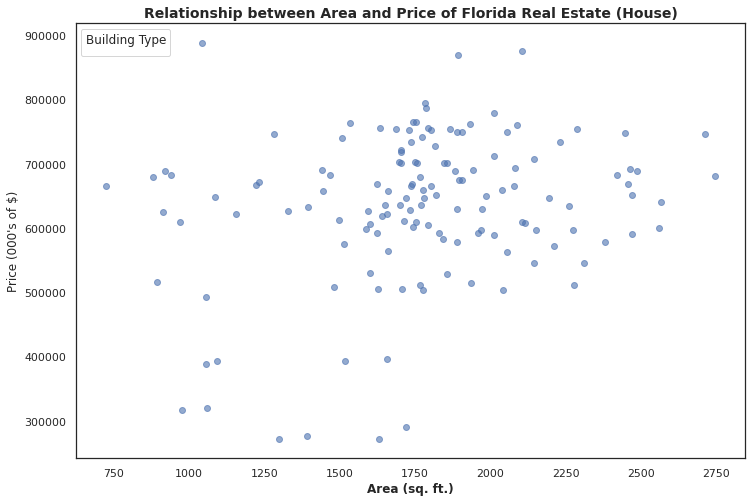

In [54]:
plt.figure(figsize = (12, 8)) # size of the figure
scatter = plt.scatter(group2['Area (ft.)'],
            group2['Price'], 
            alpha = 0.6, #transparency level of points on the plot. Used to avoid overplotting
            cmap = 'viridis') #color map for the third variable
# add and format additional elements, such as legends, titles and axis labels
plt.legend(*scatter.legend_elements(),
           loc = "upper left",
           title = "Building Type")
plt.title("Relationship between Area and Price of Florida Real Estate (House)", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Area (sq. ft.)", weight = "bold")
plt.ylabel("Price (000's of $)")
plt.show()

The scatter plots show a very strong linear relationship between Price and Area for Offices

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


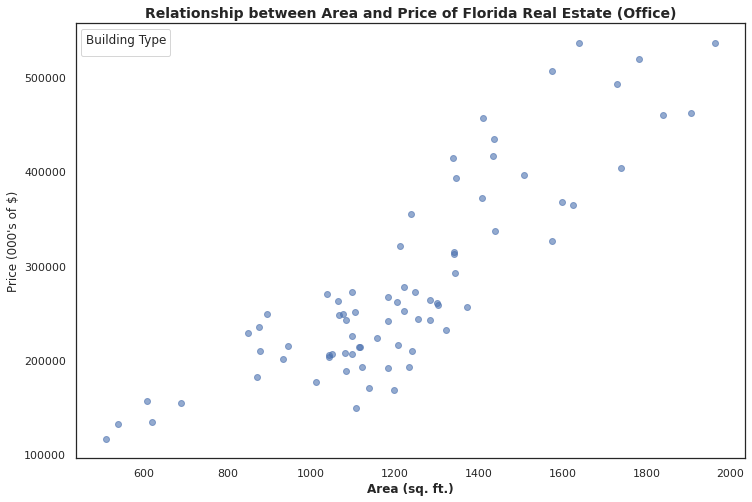

In [55]:
plt.figure(figsize = (12, 8)) # size of the figure
scatter = plt.scatter(group3['Area (ft.)'],
            group3['Price'], 
            alpha = 0.6, #transparency level of points on the plot. Used to avoid overplotting
            cmap = 'viridis') #color map for the third variable
# add and format additional elements, such as legends, titles and axis labels
plt.legend(*scatter.legend_elements(),
           loc = "upper left",
           title = "Building Type")
plt.title("Relationship between Area and Price of Florida Real Estate (Office)", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Area (sq. ft.)", weight = "bold")
plt.ylabel("Price (000's of $)")
plt.show()

**Statistical Analysis**

In [63]:
from scipy.stats import skew
from scipy import stats

Skewnees of apartment Prices: 

In [58]:
print(skew(group1['Price']))

1.3457697492547713


Skewnees of house Prices:  
 
 
The house prices exhibit a negative skewness. The mean will be less than the median.

In [59]:
print(skew(group2['Price']))

-1.0780229259088472


Skewnees of office Prices

In [60]:
print(skew(group3['Price']))

0.9166934061735359


Calculate mean, median and mode

In [65]:
mean = np.mean(group2['Price'])
median = np.median(group2['Price'])
mode = stats.mode(group2['Price'])

print('Mean = ', mean)
print('Median = ', median)
print('Mode = ', mode)

Mean =  634479.7913669065
Median =  650392.0
Mode =  ModeResult(mode=array([272450], dtype=object), count=array([2]))


Covariance and Correlation Calculation:

Apartment

In [83]:
print ("Covariance = ", np.cov(group1['Price'].astype(float), group1['Area (ft.)'].astype(float), rowvar=False)[0][1])
print ("Correlation = ", stats.pearsonr(group1['Area (ft.)'], group1['Price'])[0])    # Pearson's r


Covariance =  24880800.231764533
Correlation =  0.7722898322639614


House


In [84]:
print ("Covarianc e= ", np.cov(group2['Price'].astype(float), group2['Area (ft.)'].astype(float), rowvar=False)[0][1])
print ("Correlation = ", stats.pearsonr(group2['Area (ft.)'], group2['Price'])[0])    # Pearson's r


Covarianc e=  10897089.726274634
Correlation =  0.23186547395535517


Office

In [85]:
print ("Covariance = ", np.cov(group3['Price'].astype(float), group3['Area (ft.)'].astype(float), rowvar=False)[0][1])
print ("Correlation = ", stats.pearsonr(group3['Area (ft.)'], group3['Price'])[0])    # Pearson's r


Covariance =  26389567.80941081
Correlation =  0.8515429608311149


Note that "Houses" exhibit the highest correlation between Price and Area

**Thanks for reading!**